# Project 1:Clustering of Netflix Dataset

#Objective:


Given dataset is about various Netflix series and movies and their various features. 
Task 1. Try to find some more features through data mining techniques and feature engineering to get better quality analysis.

Task 2, using the clustering techniques, prepare clusters from the data and by finding the unique features from those clusters, provide suggestions to Netflix on how they can give better recommendations and improve their business and App.


# 1. Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

# 2.Importing Dataset

In [2]:
#Importing dataset
df = pd.read_csv('netflix_titles.csv')

In [3]:
#first five Observations
df.head(5)

show_id     type                  title         director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson   
1  s2      TV Show  Blood & Water          NaN               
2  s3      TV Show  Ganglands              Julien Leclercq   
3  s4      TV Show  Jailbirds New Orleans  NaN               
4  s5      TV Show  Kota Factory           NaN               

                                                                                                                                                                                                                                                                                                              cast  \
0  NaN                                                                                                                                                                                                                                                                                                               
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  NaN                                                                                                                                                                                                                                                                                                               
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021  2020          PG-13  90 min      
1  South Africa   September 24, 2021  2021          TV-MA  2 Seasons   
2  NaN            September 24, 2021  2021          TV-MA  1 Season    
3  NaN            September 24, 2021  2021          TV-MA  1 Season    
4  India          September 24, 2021  2021          TV-MA  2 Seasons   

                                                       listed_in  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.  
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.       
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.        
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.       
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends na

In [4]:
#Last 5 observations
df.tail(5)

show_id     type        title         director  \
8802  s8803   Movie    Zodiac       David Fincher     
8803  s8804   TV Show  Zombie Dumb  NaN               
8804  s8805   Movie    Zombieland   Ruben Fleischer   
8805  s8806   Movie    Zoom         Peter Hewitt      
8806  s8807   Movie    Zubaan       Mozez Singh       

                                                                                                                                                             cast  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chloë Sevigny   
8803  NaN                                                                                                                                                           
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf                                                           
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers                                       
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy                         

            country         date_added  release_year rating   duration  \
8802  United States  November 20, 2019  2007          R      158 min     
8803  NaN            July 1, 2019       2018          TV-Y7  2 Seasons   
8804  United States  November 1, 2019   2009          R      88 min      
8805  United States  January 11, 2020   2006          PG     88 min      
8806  India          March 2, 2019      2015          TV-14  111 min     

                                           listed_in  \
8802  Cult Movies, Dramas, Thrillers                   
8803  Kids' TV, Korean TV Shows, TV Comedies           
8804  Comedies, Horror Movies                          
8805  Children & Family Movies, Comedies               
8806  Dramas, International Movies, Music & Musicals   

                                                                                                                                                 description  
8802  A political cartoonist, a crime reporter and a pair of cops investigate San Francisco's infamous Zodiac Killer in this thriller based on a true story.  
8803  While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities.                                
8804  Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.               
8805  Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.   
8806  A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past.

# 3.Data Inspection

In [5]:
# Checking shape of the dataset
df.shape
print(f'Dataset having {df.shape[0]} rows and {df.shape[1]} columns')

Dataset having 8807 rows and 12 columns


In [6]:
# Checking column names of dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year    int64 
rating          object
duration        object
listed_in       object
description     object
dtype: object

# Observations
- Director, cast, country, date_added, and rating all have null values.
- The date_added feature contains dates, but its datatype incorrectly associates an object.

In [9]:
# Basic description of Dataset of all numerical variables
df.describe().T

count         mean       std     min     25%     50%     75%  \
release_year  8807.0  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0   

                 max  
release_year  2021.0

# Observation
* The feature release year is numerical
* All tv shows and series available on Netflix  are released between 1925 and 2021 

In [10]:
# Basic description of Dataset of all categorical variables
df.describe(include='object')

show_id   type                 title       director  \
count   8807    8807   8807                  6173            
unique  8807    2      8807                  4528            
top     s1      Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq    1       6131   1                     19              

                      cast        country       date_added rating  duration  \
count   7982                7976           8797             8803   8804       
unique  7692                748            1767             17     220        
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq    19                  2818           109              3207   1793       

                           listed_in  \
count   8807                           
unique  514                            
top     Dramas, International Movies   
freq    362                            

                                                                                                                                                      description  
count   8807                                                                                                                                                       
unique  8775                                                                                                                                                       
top     Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.  
freq    4

# Observation
* Movies are more widely available on Netflix than TV shows. 
* Most of the movies and TV shows are produced in the United States.
* Documentaries are available in the majority of movies and TV shows on Netflix.

In [11]:
def Data_info(df):
    print(f'shape : {df.shape}')
    print('-'*125)
    summary = pd.DataFrame(df.dtypes , columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name']= summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Count']= df.count().values
    summary['missng']= df.isna().sum().values
    summary['Unique']=df.nunique().values
    return summary

In [12]:
Data_info(df)

shape : (8807, 12)
-----------------------------------------------------------------------------------------------------------------------------


Name  dtypes  Count  missng  Unique
0   show_id       object  8807   0       8807  
1   type          object  8807   0       2     
2   title         object  8807   0       8807  
3   director      object  6173   2634    4528  
4   cast          object  7982   825     7692  
5   country       object  7976   831     748   
6   date_added    object  8797   10      1767  
7   release_year  int64   8807   0       74    
8   rating        object  8803   4       17    
9   duration      object  8804   3       220   
10  listed_in     object  8807   0       514   
11  description   object  8807   0       8775

In [13]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [15]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

number_of_nulls_values
columns                             
director      2634                  
country       831                   
cast          825                   
date_added    10                    
rating        4                     
duration      3                     
show_id       0                     
type          0                     
title         0                     
release_year  0                     
listed_in     0                     
description   0

In [16]:
missing_values_percentage = round(df.isna().mean()*100 , 2)
print(missing_values_percentage)

show_id         0.00 
type            0.00 
title           0.00 
director        29.91
cast            9.37 
country         9.44 
date_added      0.11 
release_year    0.00 
rating          0.05 
duration        0.03 
listed_in       0.00 
description     0.00 
dtype: float64


# Observations :
    
* Dataset having 8807 rows and 12 columns
* There are no duplicate values in this dataset.
* Director, cast, country, date_added, and rating all have null values.
* The feature release year is numerical, and everything else is categorical.
* The date_added feature contains dates, but its datatype incorrectly associates an object.

# Understanding Variables

In [17]:
# Variables/Columns of dataset
columns=list(df.columns)
print(columns)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [18]:
# Basic description of all Dataset
df.describe(include='all')

show_id   type                 title       director  \
count   8807    8807   8807                  6173            
unique  8807    2      8807                  4528            
top     s1      Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq    1       6131   1                     19              
mean    NaN     NaN    NaN                   NaN             
std     NaN     NaN    NaN                   NaN             
min     NaN     NaN    NaN                   NaN             
25%     NaN     NaN    NaN                   NaN             
50%     NaN     NaN    NaN                   NaN             
75%     NaN     NaN    NaN                   NaN             
max     NaN     NaN    NaN                   NaN             

                      cast        country       date_added  release_year  \
count   7982                7976           8797             8807.000000    
unique  7692                748            1767            NaN             
top     David Attenborough  United States  January 1, 2020 NaN             
freq    19                  2818           109             NaN             
mean    NaN                 NaN            NaN              2014.180198    
std     NaN                 NaN            NaN              8.819312       
min     NaN                 NaN            NaN              1925.000000    
25%     NaN                 NaN            NaN              2013.000000    
50%     NaN                 NaN            NaN              2017.000000    
75%     NaN                 NaN            NaN              2019.000000    
max     NaN                 NaN            NaN              2021.000000    

       rating  duration                     listed_in  \
count   8803   8804      8807                           
unique  17     220       514                            
top     TV-MA  1 Season  Dramas, International Movies   
freq    3207   1793      362                            
mean    NaN    NaN       NaN                            
std     NaN    NaN       NaN                            
min     NaN    NaN       NaN                            
25%     NaN    NaN       NaN                            
50%     NaN    NaN       NaN                            
75%     NaN    NaN       NaN                            
max     NaN    NaN       NaN                            

                                                                                                                                                      description  
count   8807                                                                                                                                                       
unique  8775                                                                                                                                                       
top     Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.  
freq    4                                                                                                                                                          
mean    NaN                                                                                                                                                        
std     NaN                                                                                                                                                        
min     NaN                                                                                                                                                        
25%     NaN                                                                                                                                                        
50%     NaN                                                                                                                                                        
75%     NaN             

In [19]:
# Finding Categorical variables
categorical_variables=[var for var in df.describe(include='object')]
print(f'Dataset having {len(categorical_variables)} categorical variables')
print('~~'*45)
print(categorical_variables)

Dataset having 11 categorical variables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [20]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print(f'Dataset having {len(numerical_variables)} numerical variables')
print('~~'*45)
print(numerical_variables)

Dataset having 1 numerical variables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['release_year']


In [21]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is", df[i].nunique())

No. of unique values in show_id is 8807
No. of unique values in type is 2
No. of unique values in title is 8807
No. of unique values in director is 4528
No. of unique values in cast is 7692
No. of unique values in country is 748
No. of unique values in date_added is 1767
No. of unique values in release_year is 74
No. of unique values in rating is 17
No. of unique values in duration is 220
No. of unique values in listed_in is 514
No. of unique values in description is 8775


In [22]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

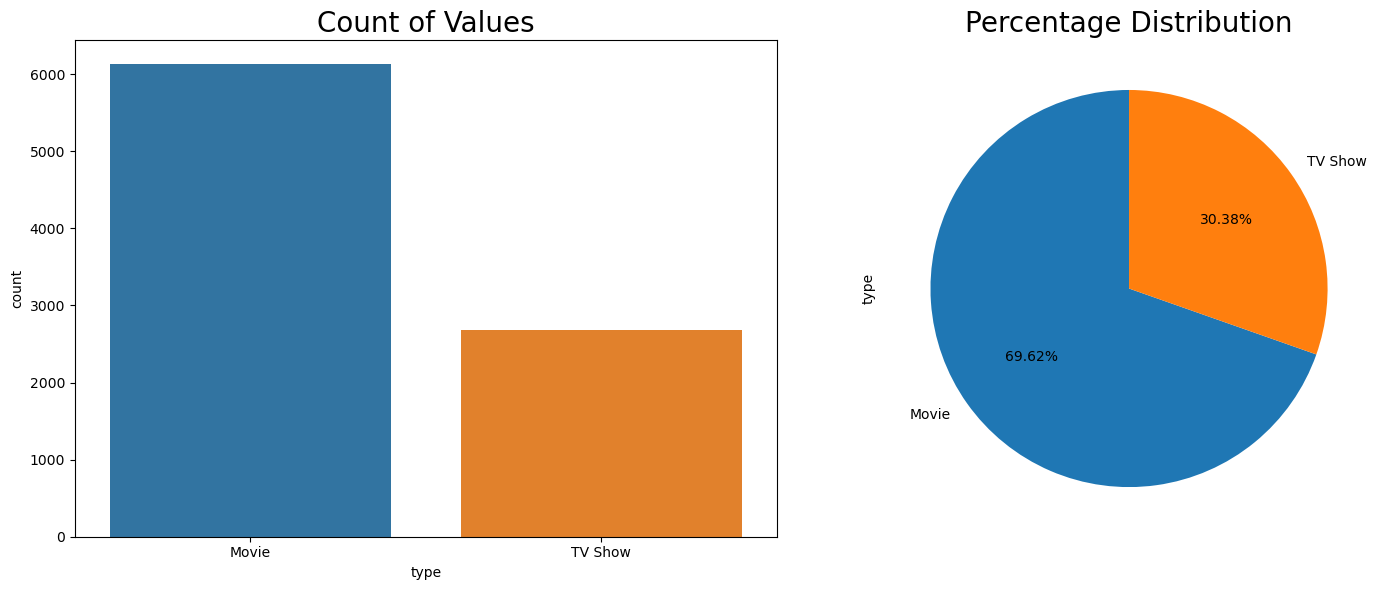

In [23]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot 
graph = sns.countplot(x = 'type', data = df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

# Observations :
* The following features are included in the dataset:  show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, and description.

* Dataset having one numerical variable, release_year.

* show_id, type, title, director, cast, country, date_added, rating, duration, listed_in, and description are the 11 categorical variables in this dataset.

# 4 Data Wrangling and Feature Engineering

### Extracting the True Values of Director Column

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Read the dataset from the CSV file
file_path = r"C:\Users\hp\Desktop\Data Science\Project 1 Clustering excelr\netflix_titles.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Function to scrape Wikipedia for director of a show
def get_director_wikipedia(title):
    url = f"https://en.wikipedia.org/wiki/{title.replace(' ', '_')}"
    print("Scraping URL:", url)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    director_tag = soup.find("th", text="Directed by")
    if director_tag:
        director = director_tag.find_next("td").text.strip()
        return director
    else:
        return None

# Fill missing director values using web scraping from Wikipedia
for index, row in df.iterrows():
    if pd.isnull(row['director']):
        director = get_director_wikipedia(row['title'])
        df.at[index, 'director'] = director
        print(f"Director for '{row['title']}': {director}")

# Display the updated dataframe
print(df)

Scraping URL: https://en.wikipedia.org/wiki/Blood_&_Water
Director for 'Blood & Water': None
Scraping URL: https://en.wikipedia.org/wiki/Jailbirds_New_Orleans
Director for 'Jailbirds New Orleans': None
Scraping URL: https://en.wikipedia.org/wiki/Kota_Factory
Director for 'Kota Factory': Raghav Subbu
Scraping URL: https://en.wikipedia.org/wiki/Vendetta:_Truth,_Lies_and_The_Mafia
Director for 'Vendetta: Truth, Lies and The Mafia': None
Scraping URL: https://en.wikipedia.org/wiki/Crime_Stories:_India_Detectives
Director for 'Crime Stories: India Detectives': N AmitJack Rampling
Scraping URL: https://en.wikipedia.org/wiki/Dear_White_People
Director for 'Dear White People': Justin Simien
Scraping URL: https://en.wikipedia.org/wiki/Falsa_identidad
Director for 'Falsa identidad': Conrado Martínez
Diego Muñoz
Jorge Rios
Scraping URL: https://en.wikipedia.org/wiki/Jaguar
Director for 'Jaguar': None
Scraping URL: https://en.wikipedia.org/wiki/Resurrection:_Ertugrul
Director for 'Resurrection: Er

In [26]:
df.director.isna().sum()

1867

### 4.1 Handling Duplicate Values

In [27]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


### 4.2 Handling Null/Missing Values

In [28]:
# Checking for number of null values
null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

number_of_nulls_values  percentage_null_values
columns                                                     
director      1867                    21.20                 
country       831                     9.44                  
cast          825                     9.37                  
date_added    10                      0.11                  
rating        4                       0.05                  
duration      3                       0.03                  
show_id       0                       0.00                  
type          0                       0.00                  
title         0                       0.00                  
release_year  0                       0.00                  
listed_in     0                       0.00                  
description   0                       0.00

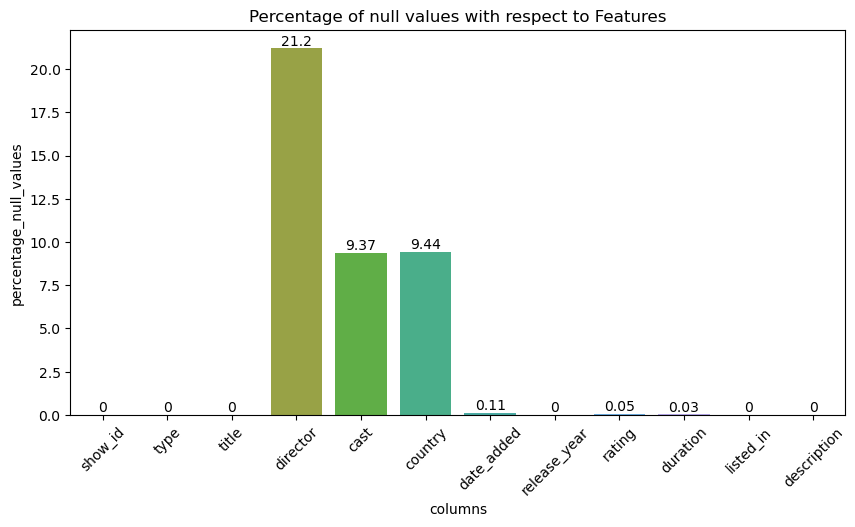

In [29]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,5))
ax=sns.barplot(x='columns', y='percentage_null_values', data=null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

# Observation
* Director, cast, country, date_added, and rating have null values in 21.19%, 9.37%, 9.44%, 0.11%, and 0.05% of their respective features.

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

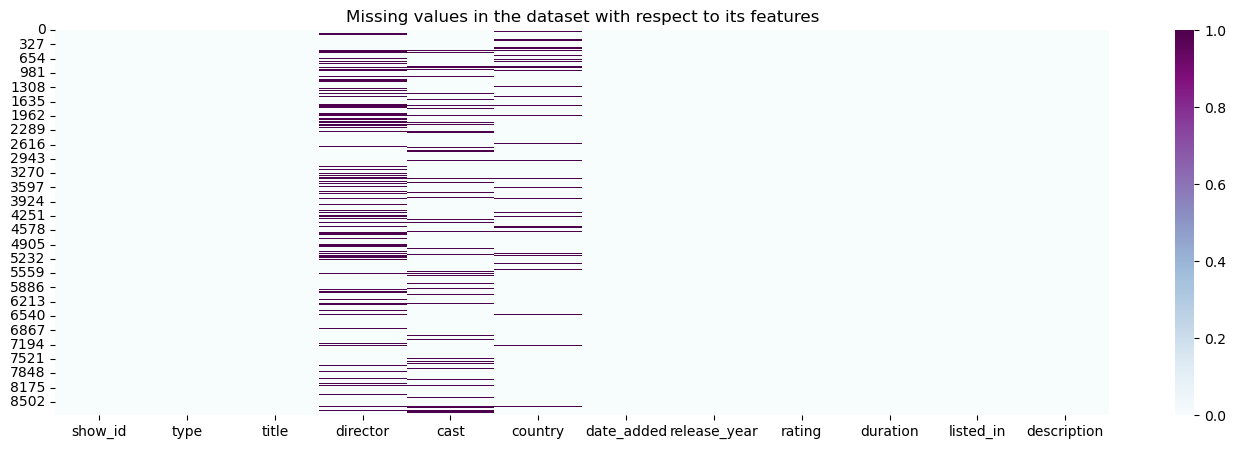

In [30]:
# Vizualizing the null values from the dataset
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True, cmap='BuPu')
plt.title('Missing values in the dataset with respect to its features')

# Inferences
* Since there are many null values for features like director, cast, and country, those null values cannot be dropped;
instead, they have been substituted with director Unavailable, Cast Unavailability, and Country Unavailable, accordingly.
* Features such as date_added and rating have a very low number of null values, so we dropped those null values

In [31]:
## Handling null values

# Filling null values of features director, cast and country
df.director.fillna("Director Unavailable",inplace=True)
df.cast.fillna("Cast Unavailable",inplace=True)
df.country.fillna("Country Unavailable",inplace=True)

# Dropping null values from date_added, rating & duration columns
df.dropna(subset=["date_added",'rating' , 'duration'],inplace=True)

In [32]:
# Check for null values that were eliminated or were not successfully eliminated.
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [33]:
# Nullfree shape of dataset
df.shape

(8790, 12)

### 4.3 Handling outliers

In [34]:
## Using Inter Quartile Range for removing outliers from numerical variables

# Capping dataset
for i in numerical_variables:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

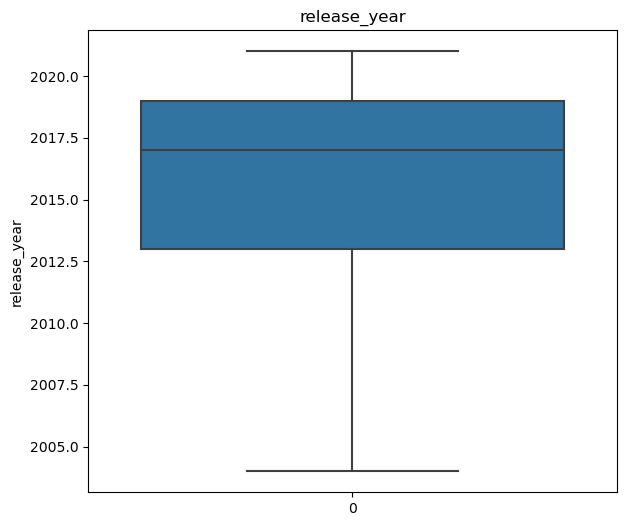

In [35]:
## Using boxplot checking outliers in features after removed using IQR

for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

# Note:

Outliers from variable release_year are successfully treated using the interquartile range.

## Feature Engineering

In [36]:
# Dataset
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country          date_added  release_year rating   duration  \
0  United States        September 25, 2021  2020          PG-13  90 min      
1  South Africa         September 24, 2021  2021          TV-MA  2 Seasons   
2  Country Unavailable  September 24, 2021  2021          TV-MA  1 Season    
3  Country Unavailable  September 24, 2021  2021          TV-MA  1 Season    
4  India                September 24, 2021  2021          TV-MA  2 Seasons   

                                                       listed_in  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.  
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.       
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.        
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.       
4  In a city of coaching centers known to train India’s finest collegi

In [37]:
# Ensure that features are in the correct data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [38]:
# Converting the data types of features date_added and release_year to the appropriate data types
df.date_added = pd.to_datetime(df['date_added'])
df.release_year = df.release_year.astype('int64')

# Renaming name of variable listed_in to genre
df.rename(columns={'listed_in':'geners'}, inplace=True)

In [39]:
## Adding new features based on feature date_added
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['day_added']=df['date_added'].dt.day

# Delete feature date_added
df=df.drop('date_added', axis='columns')
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

# Observations :


* There are no duplicate values in this dataset.

* director, cast, country, date_added, and rating have null values in 30.68%, 9.22%, 6.51%, 0.13%, and 0.09% of their   respective features.Because there are numerous null values for features such as director, cast, and country, those null values cannot be droppedinstead, they have been replaced with Director Unavailable, Cast Unavailable, and Country Unavailable, respectively.

* Features such as date_added and rating have a very low number of null values, so we dropped those null values.

* Outliers from the variable release_year are successfully treated using the interquartile range.

* Converted feature date_added to datetime and created new features from it, such as year_added, month_added, and day_added, before removing the feature date_added. 

* The listed_in feature has been renamed to geners.

* Because year cannot be a float, the feature release_year data type changed from float64 to int64.

## Exploratory data analysis

In [40]:
# Creating new dataframe having all TV shows
tv_shows_df = df[df.type=='TV Show']
tv_shows_df.head(2)

show_id     type          title              director  \
1  s2      TV Show  Blood & Water  Director Unavailable   
2  s3      TV Show  Ganglands      Julien Leclercq        

                                                                                                                                                                                                                                                                                                              cast  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               

               country  release_year rating   duration  \
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    

                                                          geners  \
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   

                                                                                                                                           description  \
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.   
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.    

   year_added  month_added  day_added  
1  2021        9            24         
2  2021        9            24

In [41]:
# Creating new dataframe having all movies
movies_df = df[df.type == 'Movie']
movies_df.head(2)

show_id   type                             title  \
0  s1      Movie  Dick Johnson Is Dead               
6  s7      Movie  My Little Pony: A New Generation   

                        director  \
0  Kirsten Johnson                 
6  Robert Cullen, José Luis Ucha   

                                                                                                                                                cast  \
0  Cast Unavailable                                                                                                                                    
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr   

               country  release_year rating duration  \
0  United States        2020          PG-13  90 min    
6  Country Unavailable  2021          PG     91 min    

                     geners  \
0  Documentaries              
6  Children & Family Movies   

                                                                                                                                                 description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.    
6  Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it.   

   year_added  month_added  day_added  
0  2021        9            25         
6  2021        9            24

## [1] Univariate Analysis 

In [47]:
# Defining r to autofit the number and size of plots
r = int(len(df.columns))

In [48]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

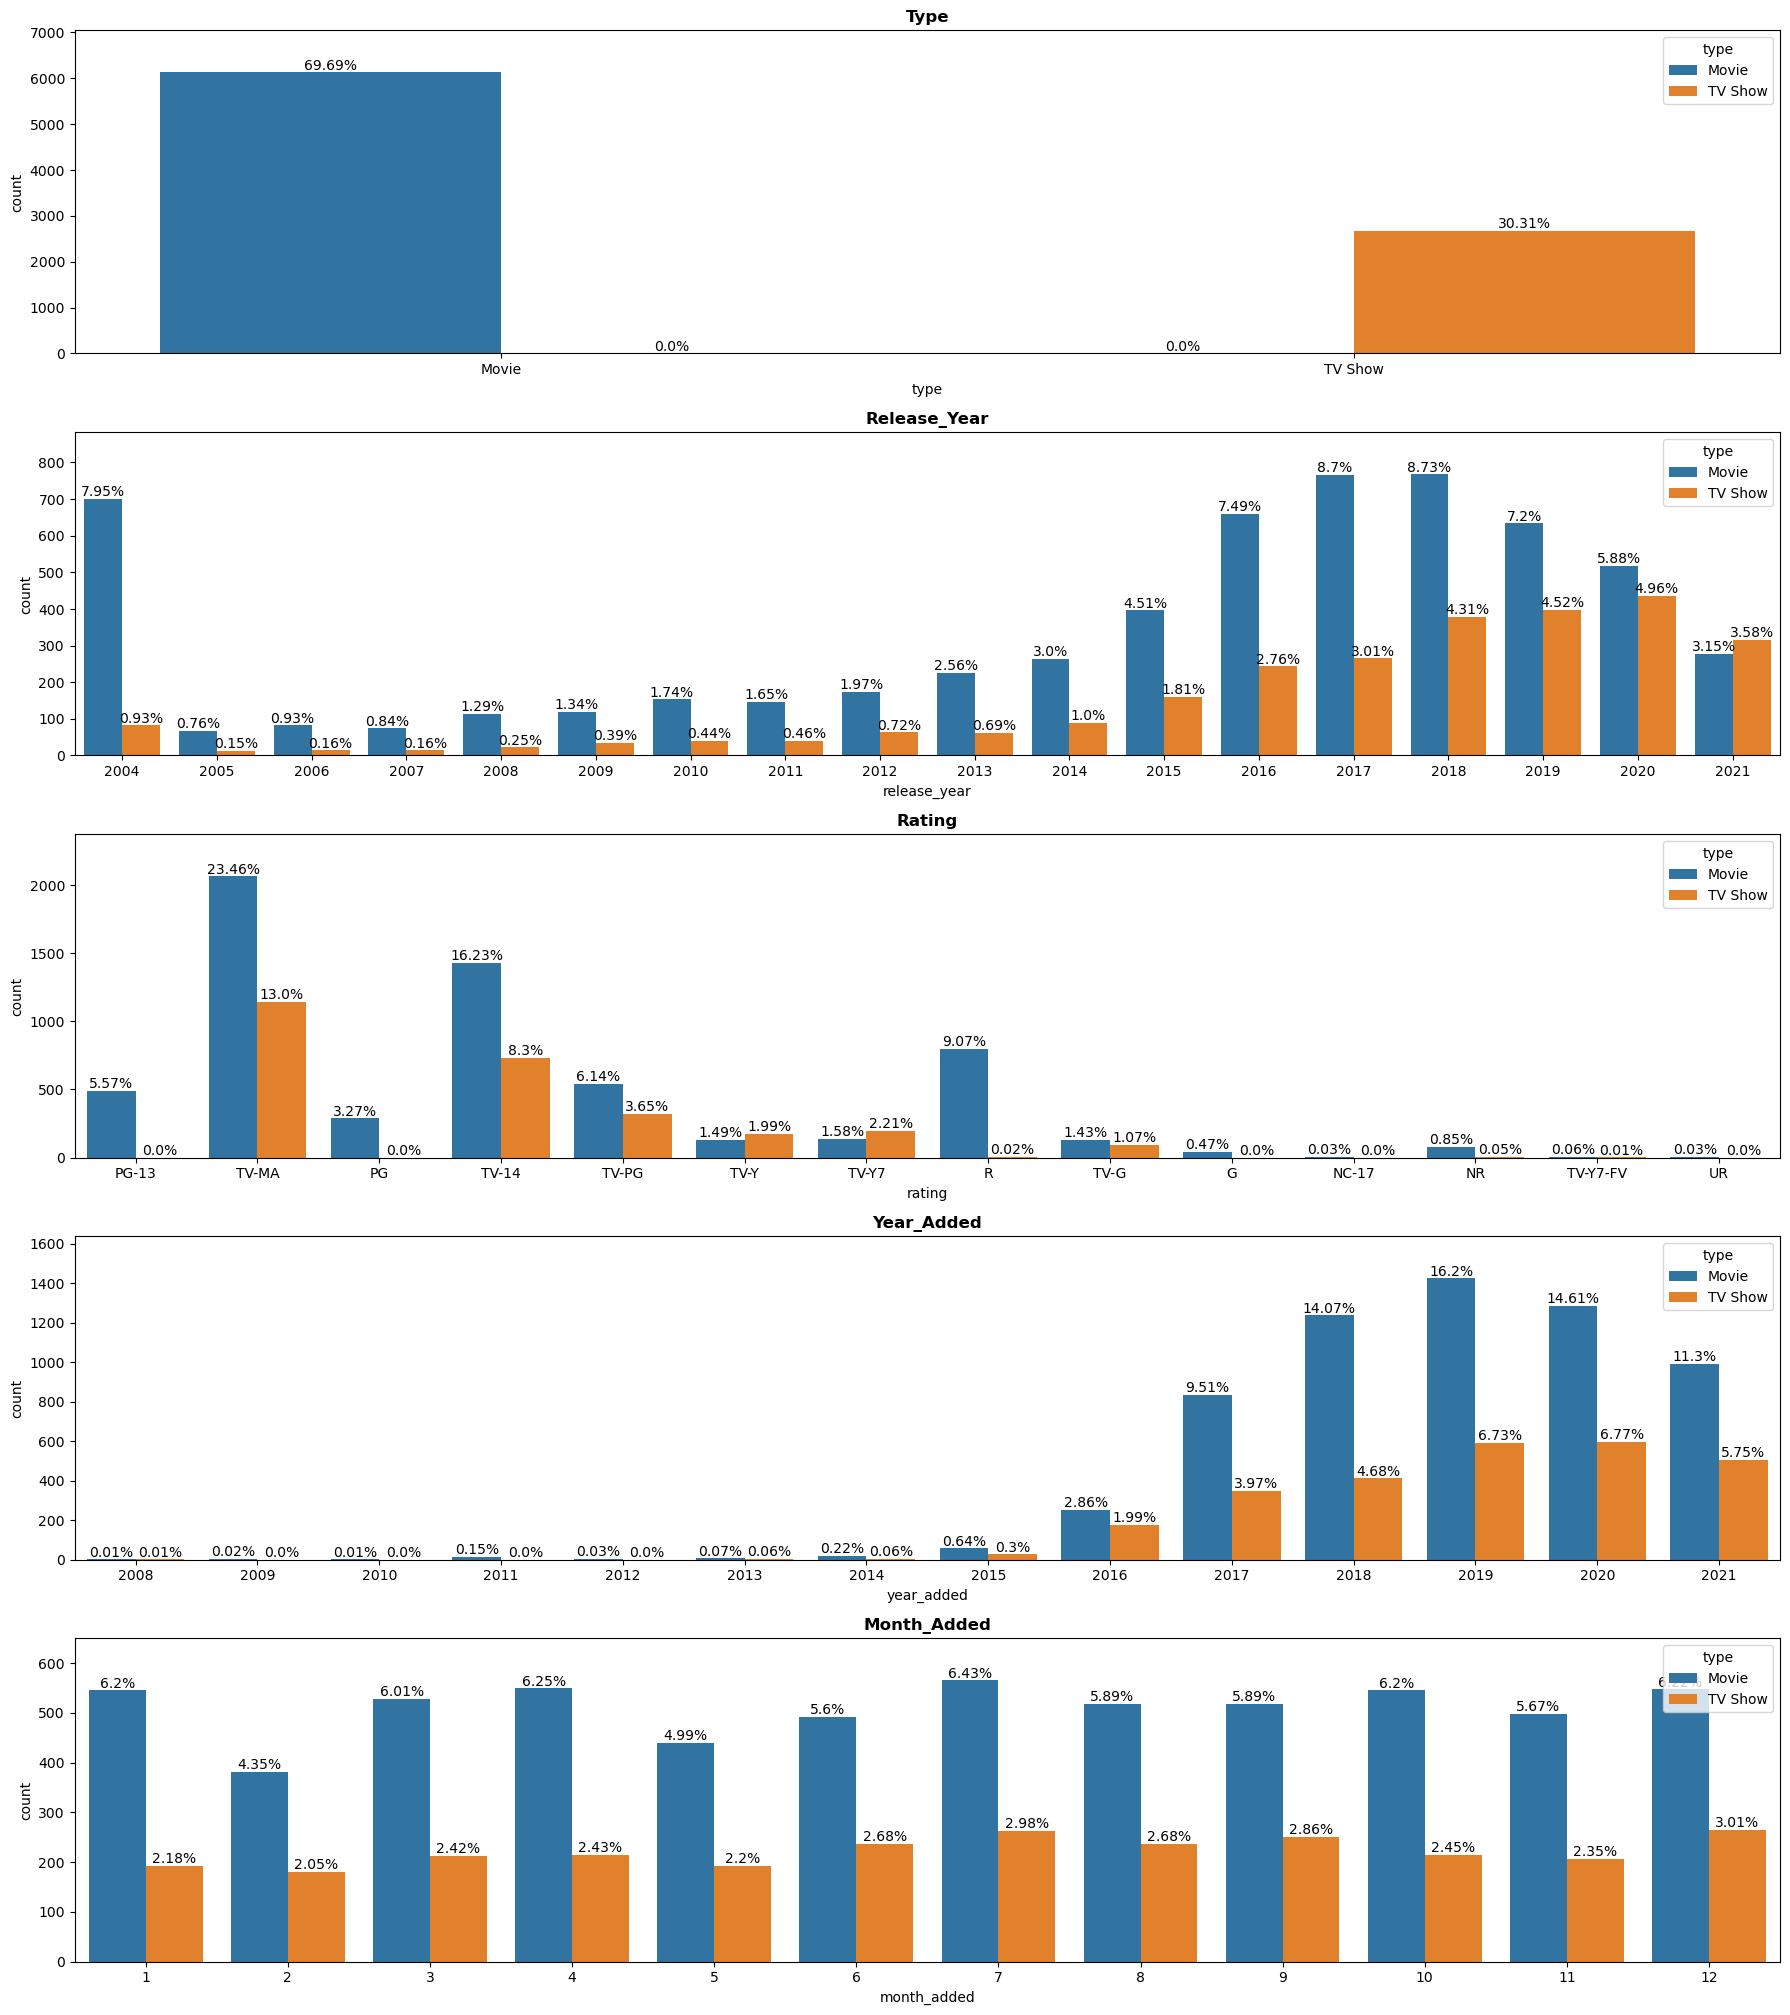

In [49]:
## Plotting the countplots for each variable in target_variables

# Obtaing target variables having maximum 20 categories in features
target_var=[var for var in df.columns if len(df[var].value_counts()) < 20]

plt.figure(figsize=(18,r*4))
for n,var in enumerate(target_var):
    plot = plt.subplot(r,1,n+1)
    ax=sns.countplot(x=df[var], hue=df['type']).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

# Observations :
    
* More movies (70 %) than TV shows (30 %) are available on Netflix.

* The majority of Netflix movies were released between 2015 and 2020, and the majority of Netflix TV shows were released between 2018 and 2020.

* The most movies and TV shows were released for public viewing on Netflix in 2018 and 2020, respectively, out of all released years.

* From 2006 to 2020 Netflix is constantly releasing more new movies than TV shows, but in 2021, it released more TV shows than new movies, indicating that Netflix has been increasingly focusing on TV rather than movies in recent years.

* More TV shows will be released for public viewing in 2020 and 2021 than at any other time in the history of Netflix.

* The majority of TV shows and movies available on Netflix have a TV-MA rating, with a TV-14 rating coming in second.

* The majority of movies added to Netflix in 2018 and the majority of TV shows added to Netflix in 2020.

* The majority of the content added to Netflix was in October and January, respectively, but almost all months throughout the year saw Netflix adding content to its platform.

## [2] Bivariate Analysis

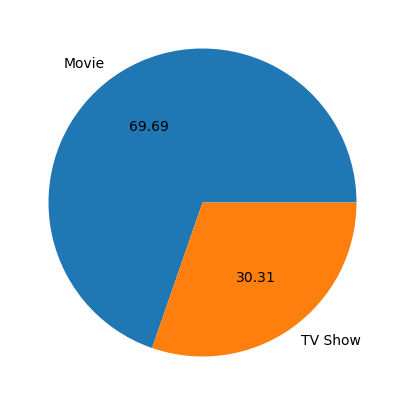

In [50]:
## Number of Movies and TV shows available on Netflix

# Defining figure size
plt.figure(figsize=(5,5))

# Declaring data
type_of_content =df.groupby(by='type').size()

# Plotting data
plt.pie(type_of_content,labels=['Movie','TV Show'],autopct='%.2f')

# Displaying chart
plt.show()

* Netflix has more movies (69.69%) than TV shows (30.31%).

<Figure size 500x500 with 0 Axes>

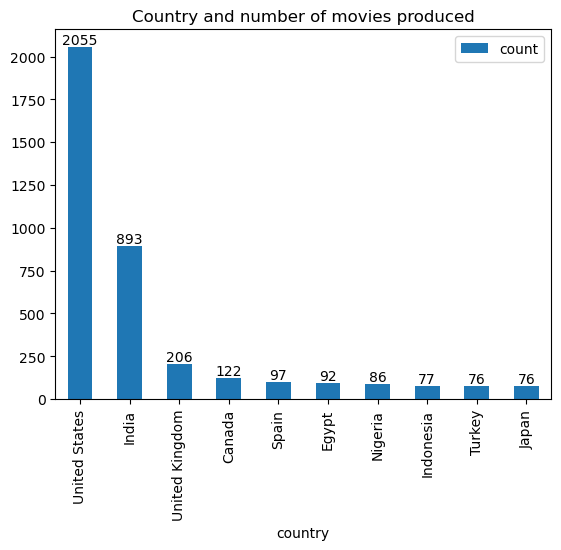

In [51]:
## The country where the majority of movies are produced

# Creating a dataframe for countries where movie are produced and counting them
movie_country_df=pd.DataFrame(movies_df.groupby(by='country').size()).sort_values(by= 0, ascending = False)
movie_country_df.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
movie_country_df=movie_country_df[movie_country_df.index != 'Country Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=movie_country_df.head(10).plot(kind='bar')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.title('Country and number of movies produced')

# Displaying plot
plt.show()

* The majority of movies available on Netflix are produced in the United States, with India coming in second.

<Figure size 500x500 with 0 Axes>

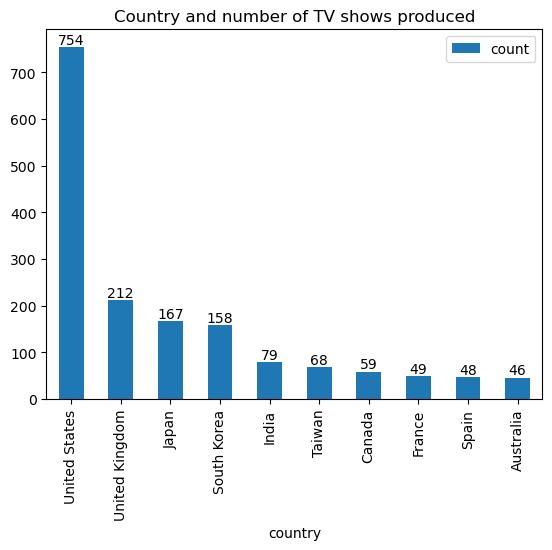

In [52]:
## The country where the majority of TV shows are produced

# Creating a dataframe for countries where TV shows are produced and counting them
tv_show_country_df=pd.DataFrame(tv_shows_df.groupby(by='country').size()).sort_values(by= 0, ascending = False)
tv_show_country_df.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
tv_show_country_df=tv_show_country_df[tv_show_country_df.index != 'Country Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=tv_show_country_df.head(10).plot(kind='bar')

# Assigning labels to the graph
plt.title('Country and number of TV shows produced')
ax.bar_label(ax.containers[0])

# Displaying plot
plt.show()

* The  United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.

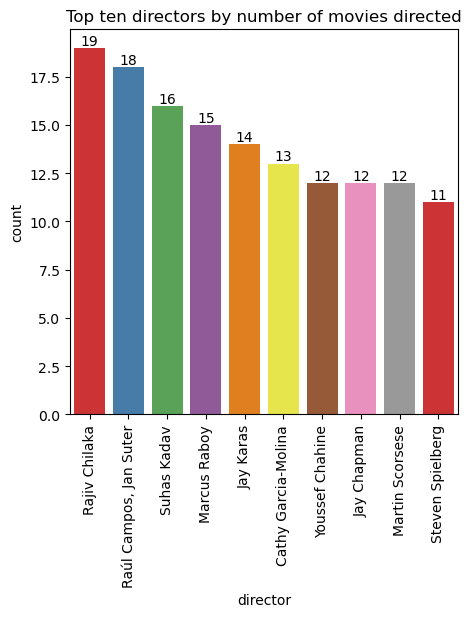

In [53]:
## The directors of the majority of movies

# Removing observations where the director is unavailable
movied_df=movies_df[movies_df['director'] != 'Director Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of movies
ax=sns.countplot(x=movied_df['director'], order=movied_df.director.value_counts().index[:10], palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by number of movies directed')

# Displaying plot
plt.show()

* Rajiv Chilaka & Raul Campos,Jan Suter directed most of the movies available on Netflix for public viewing

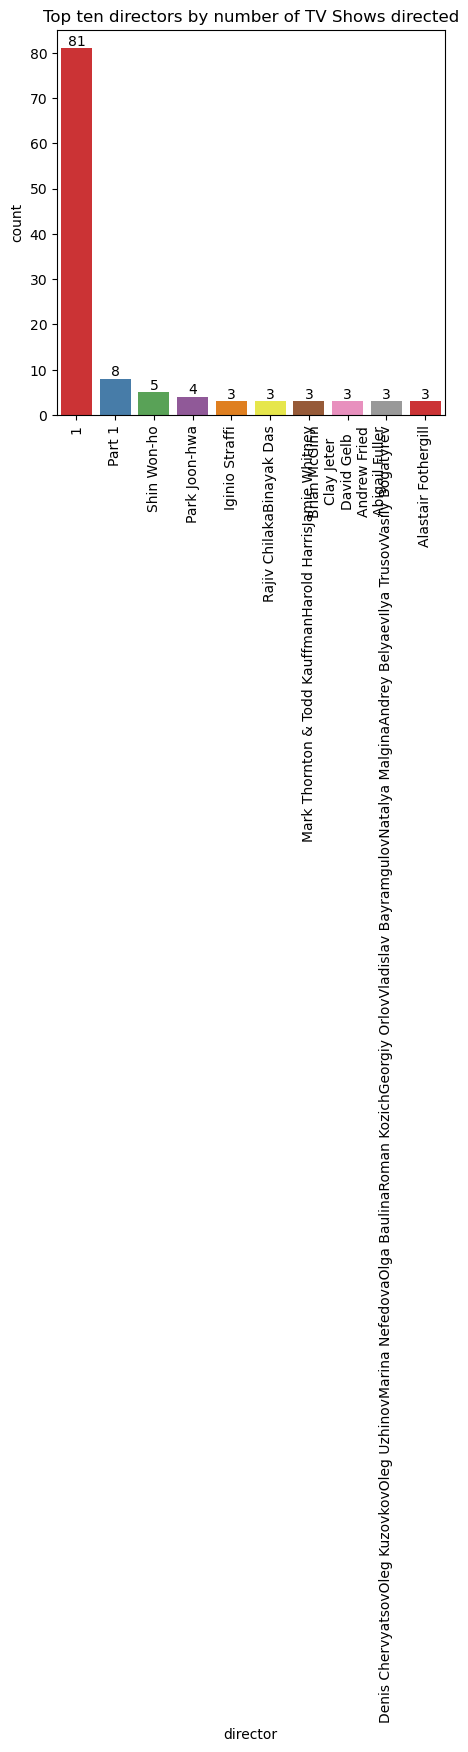

In [54]:
## The directors of the majority of TV Shows

# Removing observations where the director is unavailable
tv_shows_df=tv_shows_df[tv_shows_df['director'] != 'Director Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 directors of TV Shows
ax=sns.countplot(x=tv_shows_df['director'], order=tv_shows_df.director.value_counts().index[:10],palette='Set1')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by number of TV Shows directed')

# Displaying plot
plt.show()

* Alastair Fothergill directed most of the TV shows available on Netflix for public viewing.

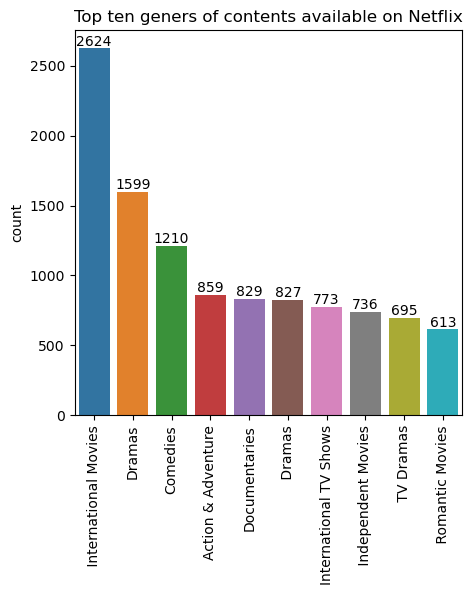

In [55]:
## Netflix's Most Popular Content Genres

# Creating a dataframe for geners
geners_df=df.geners.str.split(',', expand=True).unstack()

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting count plot graph for top most 10 geners of content available on Netflix
ax=sns.countplot(x=geners_df, order=geners_df.value_counts().index[:10])

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten geners of contents available on Netflix')

# Displaying plot
plt.show()

* International movies and the second-most popular dramas are available on Netflix as content.

In [ ]:
# # Install worldcloud library in python envirnoment
# !pip install wordcloud

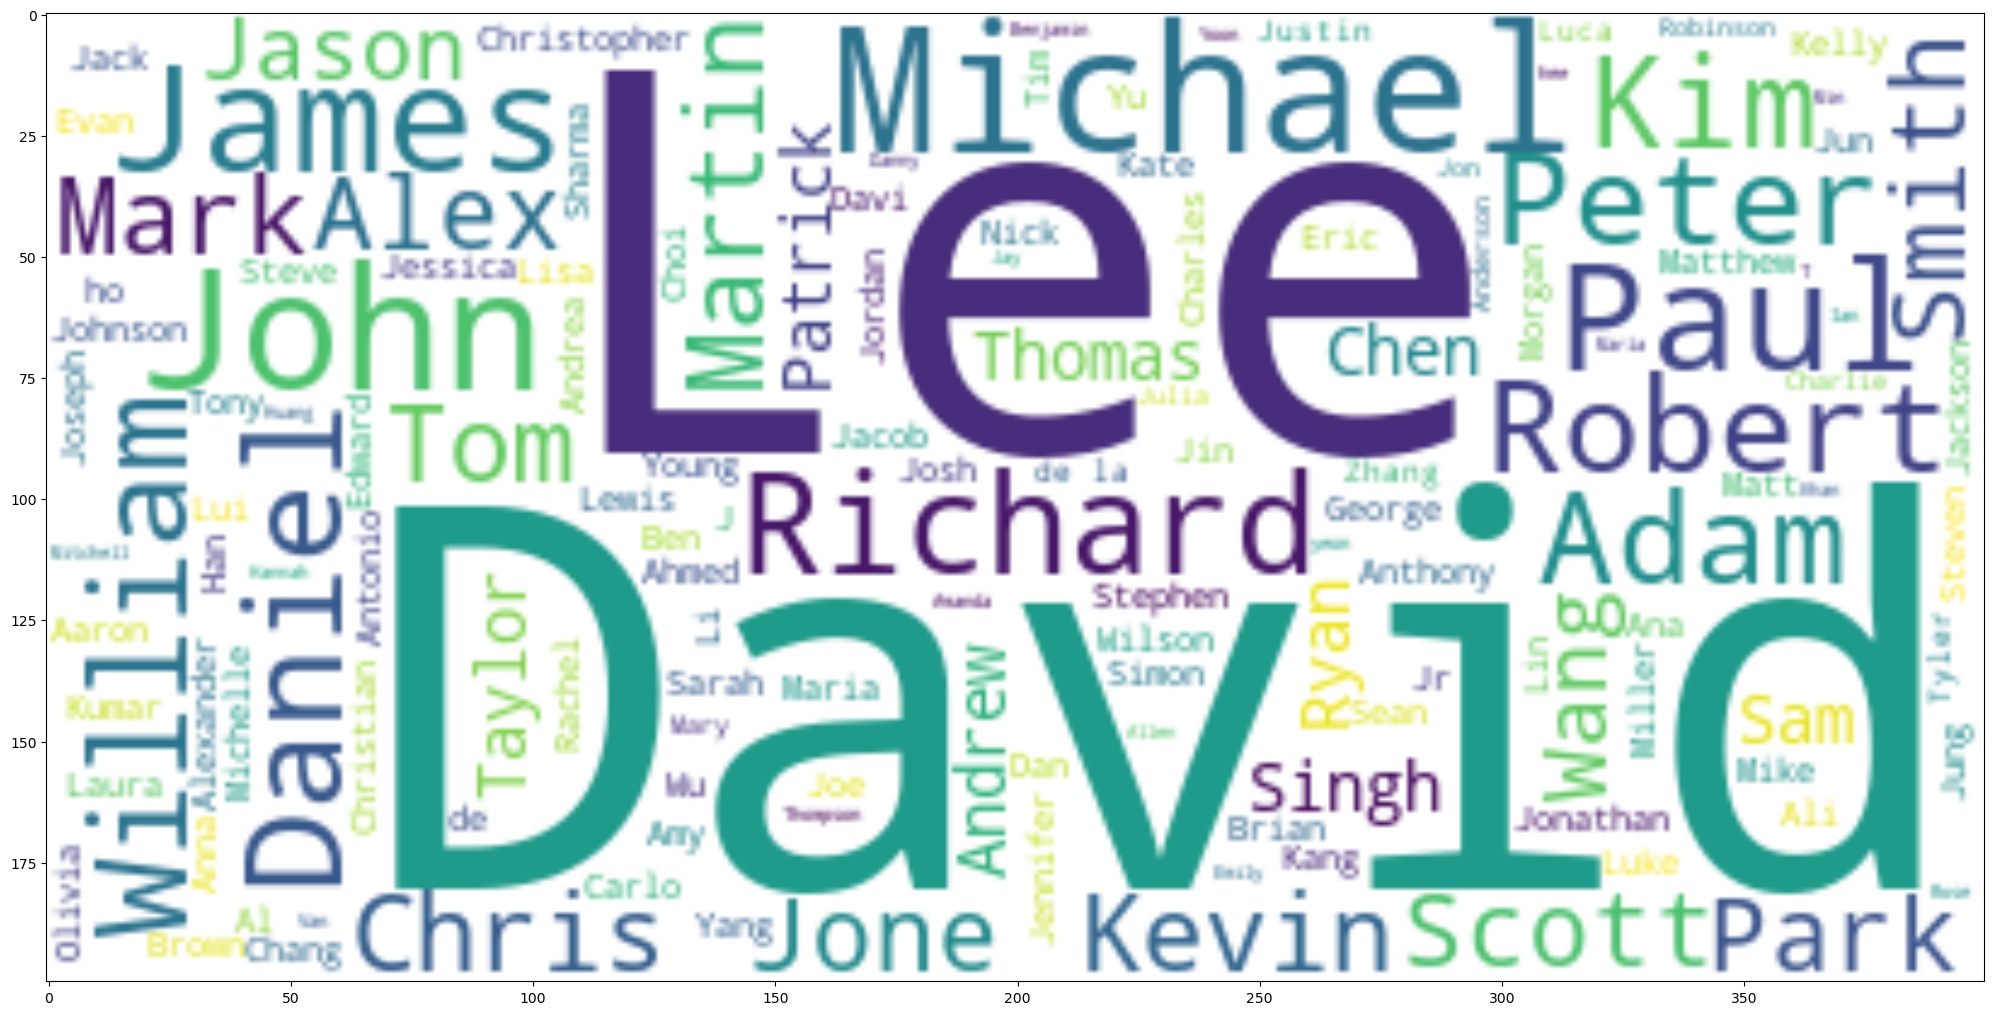

In [56]:
## Wordcloud for actors involved in movies and TV Shows available on Netflix

# Import worldcloud library
from wordcloud import WordCloud

# Defining size of plot
plt.subplots(figsize=(25,15))

# Removing observations where the cast is unavailable
cast_df=df[df['cast'] != 'Cast Unavailable']

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(','.join(cast_df.cast))

# Ploting graph
plt.imshow(wordcloud, interpolation="bilinear")

# Displaying plot
plt.show()

* Actors who have appeared in films and TV shows that are most available on Netflix are David ,Lee ,Michael & James.

# Observations :
* Netflix has more movies (69.69%) than TV shows (30.31%).
* The majority of movies available on Netflix are produced in the United States, with India coming in second.
* The United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.
* Rajiv Chilaka & Raul Campos,Jan Suter directed most of the movies available on Netflix for public viewing
* Alastair Fothergill directed most of the TV shows available on Netflix for public viewing.
* International movies and the second-most popular dramas are available on Netflix as content.
* Actors who have appeared in films and TV shows that are most available on Netflix are. David ,Lee ,Michael & James.

## [3] Multivariate Analysis

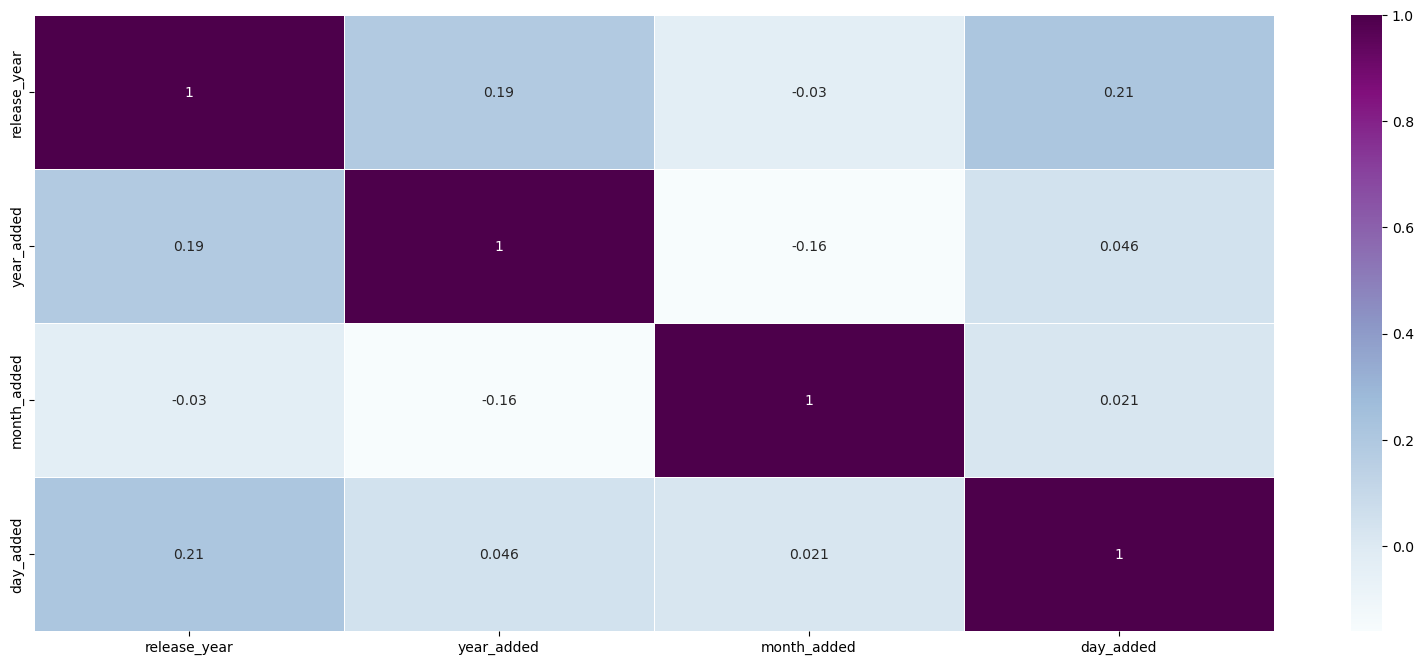

In [57]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
fig, ax = plt.subplots(figsize = (20, 8))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap='BuPu', linewidths=0.5)
plt.show()

* We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other

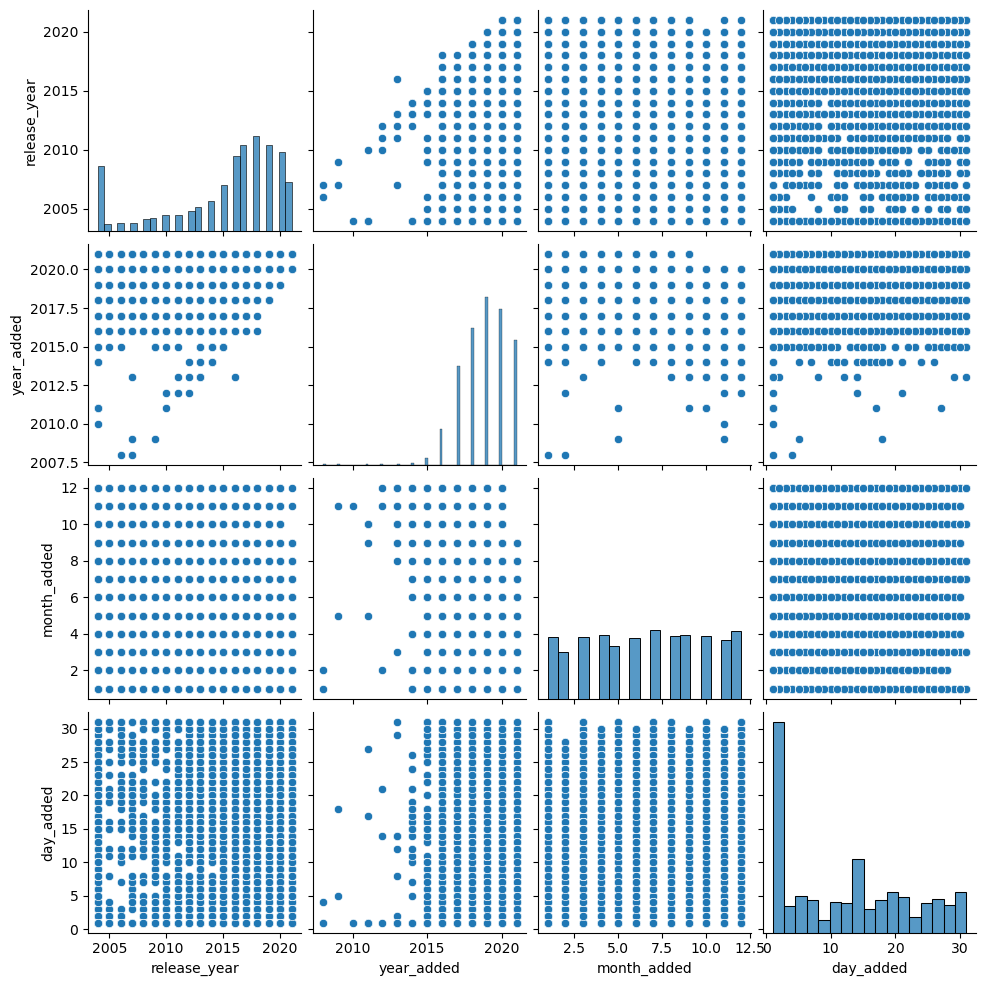

In [58]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

* Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.
* We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.

# Observations :
* We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other.
* Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.
* We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.

# Data Pre-processing

## [1] Textual Data Preprocessing

* We plan to cluster similar content by matching text-based features, so only the description variable from dataset is used for clustering.

In [59]:
## Creating new feature having length of words of description variable 
df['description_len'] = df['description'].apply(lambda x: len(x.split()))
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

### [1.1] Expand Contraction¶
Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. Removing contractions contributes to text standardisation because words play an important role in NLP

In [ ]:
# # Install contraction library in the envirnoment
# !pip install contractions

In [60]:
## Function to expands contractions from the corpus

# import contractions library
import contractions

def contraction_process(corpus):
    '''Function which expands contractions from the corpus
    Args:
    corpus (string): corpus to which function is to be applied
    Returns:
    corpus with expanded contractions
    '''
    corpus = contractions.fix(corpus)
    return corpus

# Apply the contraction_process function to each examples in description variable
df['contractions_description']=df['description'].apply(contraction_process)
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

* Using the contractions library in Python, contractions were successfully eliminated from the corpus

### [1.2] Lower Casing and Remove Stopwords and Punctuations

In [ ]:
# Updating nltk library
import nltk
nltk.download('stopwords')

In [61]:
# Importing stopwords from nltk library
from nltk.corpus import stopwords
# Extracting the English stopwords from nltk library
stopwords = stopwords.words('english')
# Displaying the English stopwords
np.array(stopwords)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [62]:
# Length of English stopwords
print("Number of English stopwords : ", len(stopwords))

Number of English stopwords :  179


In [63]:
# Import punctuations
import string
# Extracting punctuations
punctuations = string.punctuation
# Displaying the punctuations
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
## Creating new variable punctuation_% contain percentage of punctuations in each corpus
import string

def punctuation_count(txt):
    count = sum([1 for c in txt if c in punctuations])
    return 100*count/len(txt)

# Apply function to contractions_description variable
df['punctuation_%'] = df['contractions_description'].apply(lambda x: punctuation_count(x))
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

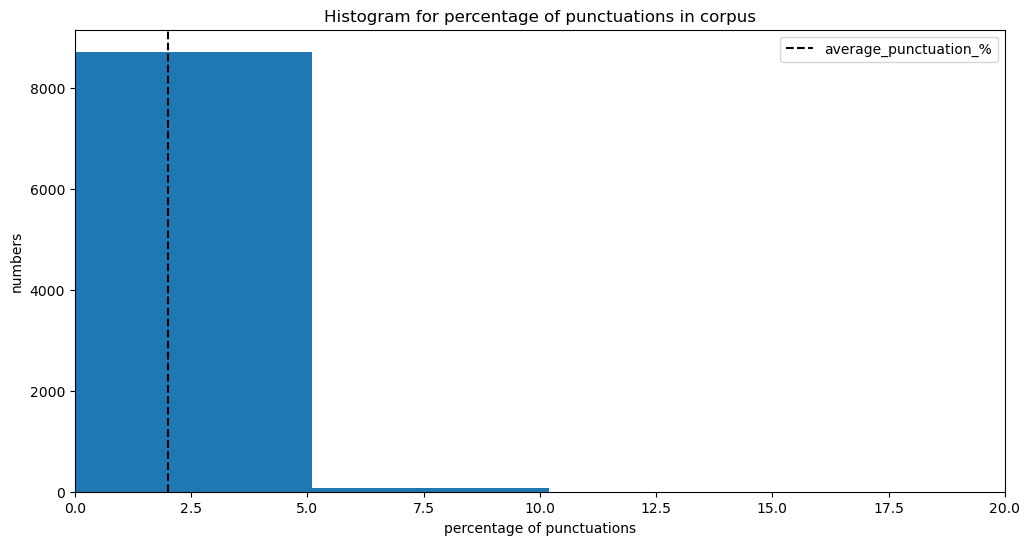

In [65]:
## Histogram for percentage of punctuations in contractions_description variable

# Define size of plot
plt.figure(figsize=(12,6))
bins = np.linspace(0, 250, 50)

# Plot histogram
plt.hist(df['punctuation_%'], bins)
plt.axvline(df['punctuation_%'].mean(), color='black', linestyle='dashed', label='average_punctuation_%')

# Labeling to plot
plt.title('Histogram for percentage of punctuations in corpus')
plt.xlabel('percentage of punctuations')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,20)

# Display plot
plt.show()

* The majority of the corpus contains punctuation that accounts for less than 5% of the total corpus

In [66]:
## Function to remove stopwords and punctuations and lower casing to the corpus

def remove_stopwords_punctuations(corpus):
    '''Function which removes stopwords and punctuations and lower casing to the corpus
    Args:
    corpus (string) to which function is to be applied
    Returns:
    lowercase corpus without stopwords and punctuations
    '''
    nopunc =[char for char in corpus if char not in punctuations]
    nopunc=''.join(nopunc)
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in stopwords])

# Apply the remove_stopwords_punctuations function to each instance in variable contractions_description
df['no_sw_pun_description']=df['contractions_description'].apply(remove_stopwords_punctuations)
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

* Successfully converted to lower case and removed stopwords and punctuation from the corpus using function remove_stopwords_punctuations.

### [1.3] Remove URLs

In [67]:
## Function to removes URL addresses from a corpus

# Import regex library
import re

def remove_URL(corpus):
    '''
    Removes URL addresses from a corpus, if present
    Args:
        corpus (string): String to which the function is to be applied
    Returns:
        clean string without URL addresses
    ''' 
    return re.sub(r'https?://\S+|www\.\S+', '', corpus)

# Apply the remove_URL function to each instance in variable no_sw_pun_description
df['clean_description']=df['no_sw_pun_description'].apply(remove_URL)
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

* All URLs are removed from each corpus from variable no_sw_pun_description

### [1.4] Remove Emails

In [68]:
## Function to removes email addresses from a corpus

def remove_emails(corpus):
    '''
    Removes email addresses from a corpus, if present
    Args:
        corpus (string): String to which the function is to be applied
    Returns:
        clean string without email addresses
    ''' 
    corpus_split = corpus.split()
    return ' '.join([i for i in corpus_split if '@' not in i])

# Apply the remove_emails function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_emails)
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

* Email addresses are removed from the corpus if they are present, using the remove_emails function.

### [1.5] Removes HTML-Tags

In [69]:
## Function to removes HTML-Tags from a corpus

# Import BeautifulSoup library
from bs4 import BeautifulSoup

def remove_html_tags(corpus):
    '''
    Removes HTML-Tags from a corpus, if present
    Args:
        text (string): corpus to which the function is to be applied,
    Returns:
        Clean corpus without HTML-Tags
    ''' 
    return BeautifulSoup(corpus, 'html.parser').get_text()

# Apply the remove_html_tags function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_html_tags)
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

* All HTML tags are removed using remove_html_tags function.

### [1.6] Remove Special Characters

In [70]:
## Function to remove special characters

# Import regex library
import re

def remove_special_char(corpus):
    """Remove Special Characters from the corpus, if present
    args:
    corpus (string): corpus to which a function is to be applied
    return:
    clean corpus without  special characters
    """
    return re.sub(r"[^a-zA-Z0-9]"," ",corpus)

# Apply the remove_special_char function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_special_char)
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

* Special characters from the corpus are successfully removed

### [1.7] Removing Words and Digits Contain Digits

In [71]:
## Function to removes digits from a corpus

# Import regex library
import re


def remove_digits(corpus):
    '''
    Removes digits from a corpus, if present
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        Clean string without digits
    ''' 
    return re.sub('\w*\d\w*','',corpus)

# Apply the remove_digits function to each instance in variable clean_description
df['clean_description']=df['clean_description'].apply(remove_digits)
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

* The function remove_digits effectively removed digits from the corpus

### [1.8] Remove Whitespaces

In [72]:
## Function to removes extra whitespaces from a corpus

# Import regex library
import re

def remove_extra_whitespaces(corpus):
    '''
    Removes extra whitespaces from a corpus, if present
    Args:
        text (string): corpus to which the function is to be applied
    Returns:
        Clean string without extra whitespaces
    ''' 
    return re.sub(r'^\s*|\s\s*', ' ', corpus).strip()

# Apply the remove_extra_whitespaces function to each instance to variable clean_description
df['clean_description']=df['clean_description'].apply(remove_extra_whitespaces)
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

* Extra whitespaces generated during the text processing are successfully removed.

### [1.9] Tokenization

In [73]:
## Function for tokenizing the corpus

# Import dependancy
import nltk
nltk.download('punkt')

def tokenization_fun(corpus):
    '''
    Function tokenize corpus
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        tokenised corpus
    '''
    return nltk.word_tokenize(corpus)

# Apply the tokenization_fun function to each instance in variable clean_description
df['tokenized_description']=df['clean_description'].apply(tokenization_fun)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

* We successfully tokenized each instance from the clean_description variable

### [1.10] Text Normalization

#Stemming

* Stemming is a process to reduce the word to its root stem for example run, running, runs, runed derived from the same word as run. basically stemming do is remove the prefix or suffix from word like ing, s, es, etc. NLTK library is used to stem the words. There are various types of stemming algorithms like porter stemmer, snowball stemmer. Porter stemmer is widely used present in the NLTK library.

* The stemming technique is not used for production purposes because it is not so efficient technique and most of the time it stems the unwanted words. So, to solve the problem another technique came into the market as Lemmatization.

* So we use lemmitization, not stemming, for text normalization here.

#### We write the raw function, which stems the word using Porter Stemmer, but we will use only lemmatization for text normalization, so the stemming function is not to be executed.

In [76]:
## Function to perform stemming operation on corpus

# Import lirary
from nltk.stem.porter import PorterStemmer

# Create object for stemming
porter_stemmer = PorterStemmer()

# Creating function for stemming
def stemming(tokenized_text):
    '''Function which stem each word in token'''
    text = [porter_stemmer.stem(word) for word in tokenized_text]
    return text

#### We write the raw function, which stems the word using Porter Stemmer, but we will use only lemmatization for text normalization, so the stemming function is not to be executed.

### Lemmatization

Lemmatization is similar to stemming but it brings context to the words. Lemmatization is similar to stemming, used to stem the words into root word but differs in working. Actually, Lemmatization is a systematic way to reduce the words into their lemma by matching them with a language dictionary. Lemmatization only stemmed those words which are really required as per the language dictionary.

In [77]:
## Function to perform lemmatization operation on corpus

# Import lirary
import nltk
from nltk.stem import WordNetLemmatizer

# Download all nltk corpuses
nltk.download('wordnet')
nltk.download('omw-1.4')

# Create object for lemmatization
lemmatizer = WordNetLemmatizer()

# Creating function for lemmatization
def lemmatization(tokenized_text):
    '''Function which lemmatize each word in token'''
    text = [lemmatizer.lemmatize(word, pos="v") for word in tokenized_text]
    return text

# Apply the lemmatization function to each instance in variable tokenized_description
df['lemmatized_description'] = df['tokenized_description'].apply(lambda x : lemmatization(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

* We successfully lemmatized each tokenized corpus

### [1.11] Join all words back together after Text Normalization

You don't need to keep words tokenized. Join them back together after you normalize so that there is one string in each row.

In [78]:
## Creating new feature which Join all words back together in string in each row
df['final_description'] = df['lemmatized_description'].apply(lambda x: ' '.join(x))
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

In [79]:
## Creating new feature having length of words of variable final_description after joining back to string 
df['final_description_len'] = df['final_description'].apply(lambda x: len(x.split()))
df.head()

show_id     type                  title              director  \
0  s1      Movie    Dick Johnson Is Dead   Kirsten Johnson        
1  s2      TV Show  Blood & Water          Director Unavailable   
2  s3      TV Show  Ganglands              Julien Leclercq        
3  s4      TV Show  Jailbirds New Orleans  Director Unavailable   
4  s5      TV Show  Kota Factory           Raghav Subbu           

                                                                                                                                                                                                                                                                                                              cast  \
0  Cast Unavailable                                                                                                                                                                                                                                                                                                  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                               
3  Cast Unavailable                                                                                                                                                                                                                                                                                                  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar                                                                                                                                                                                                          

               country  release_year rating   duration  \
0  United States        2020          PG-13  90 min      
1  South Africa         2021          TV-MA  2 Seasons   
2  Country Unavailable  2021          TV-MA  1 Season    
3  Country Unavailable  2021          TV-MA  1 Season    
4  India                2021          TV-MA  2 Seasons   

                                                          geners  \
0  Documentaries                                                   
1  International TV Shows, TV Dramas, TV Mysteries                 
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
3  Docuseries, Reality TV                                          
4  International TV Shows, Romantic TV Shows, TV Comedies          

                                                                                                                                                description  \
0  As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.   
1  After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.        
2  To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.         
3  Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.        
4  In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   

   year_added  month_adde

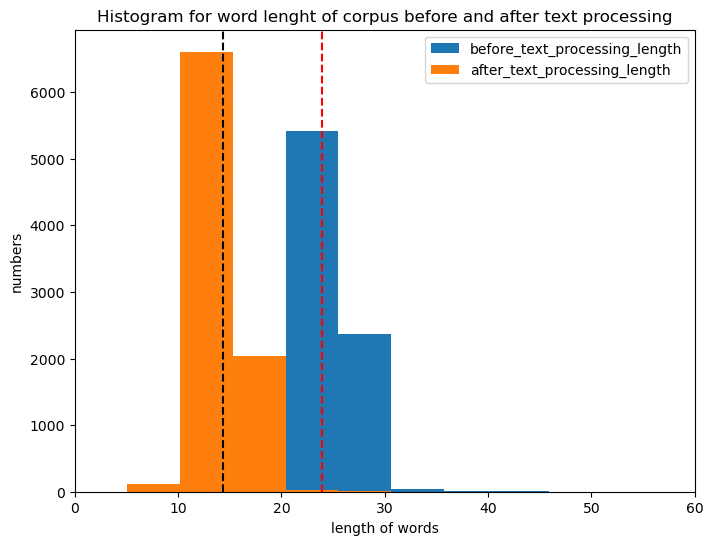

In [80]:
## Histogram for lenght of word before and after text processing

# Define figure size
plt.figure(figsize=(8,6))
bins = np.linspace(0, 250, 50)

# Plot histograms
plt.hist(df['description_len'], bins, label='before_text_processing_length')
plt.hist(df['final_description_len'], bins, label='after_text_processing_length')

# Plot vertically mean
plt.axvline(df['description_len'].mean(), color='red', linestyle='dashed')
plt.axvline(df['final_description_len'].mean(), color='black', linestyle='dashed')

# Labeling plot
plt.title('Histogram for word lenght of corpus before and after text processing')
plt.xlabel('length of words')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,60)

# Display the plot
plt.show()

* After text processing, each corpus has, on average, 14 words, but before text processing, each corpus contains, on average, 24 words.

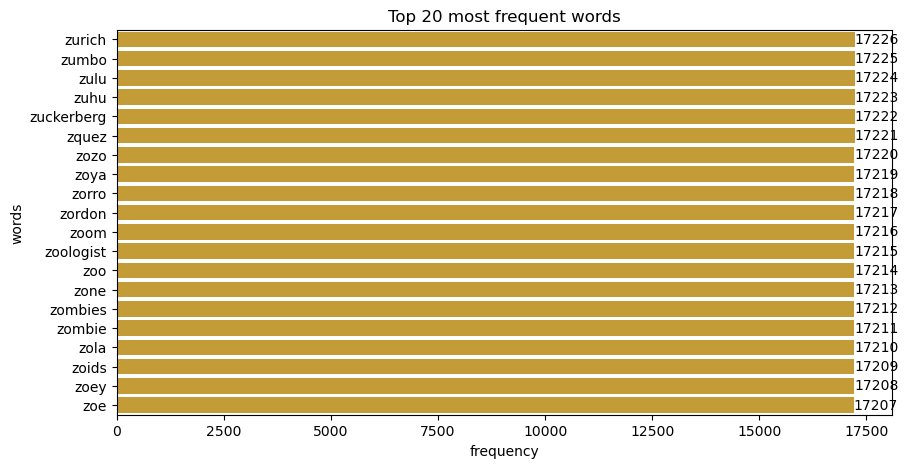

In [81]:
#### Top words after cleaning text

## Collect vocabulary count

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
X = tfid_vectorizer.fit(df['final_description'])

# Collect the vocabulary items used in the vectorizer
dictionary = X.vocabulary_.items()

## Bar plot of top words after cleaning text

# Lists to store the vocab and counts
vocab = []
count = []

# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)

# Store the count in panadas dataframe with vocab as index
vocab_count_df = pd.Series(count, index=vocab)

# Sort the dataframe
vocab_count_df= vocab_count_df.sort_values(ascending=False)

# Top 20 vocab
top_vacab = vocab_count_df.head(20)

# Plot of the top 20 vocab
plt.figure(figsize=(10,5))
ax=sns.barplot(y=top_vacab.index, x=top_vacab.values, color='goldenrod')
ax.set_title('Top 20 most frequent words')
ax.set_xlabel('frequency')
ax.set_ylabel('words')
ax.bar_label(ax.containers[0])
plt.show()

* zurich, zumbo, zulu, zuhu, and zuckerberg are the top 5 most frequent words in the corpus.

### [1.12] Text Vectorization

In [82]:
## Vetorization

# Extract the tfid representation matrix of the text data

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the object of tfid vectorizer
vectorizer=TfidfVectorizer()

# Fit the vectorizer using the text data
X_tfidf = vectorizer.fit_transform(df['final_description'])

In [83]:
# Collect the tfid matrix in numpy array
X_array = X_tfidf.toarray()
X_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
# Shape of the array
X_array.shape

(8790, 17227)

* Array having 8790 observations and 17227 features

You can also implement PCA for dimension reduction or just use the parameter max_features={value} in the TFIDFvector object to dimension reduction. But if you use PCA, then you need to again do text vectorization on new data generated after PCA

In [85]:
# Store the tf-idf array into pandas dataframe
dataset = pd.DataFrame(X_array, columns = vectorizer.get_feature_names_out())
dataset.head()

aaliya  aamir  aang  aardman  aaron  abad  abagnale  abah  abandon  \
0  0.0     0.0    0.0   0.0      0.0    0.0   0.0       0.0   0.0       
1  0.0     0.0    0.0   0.0      0.0    0.0   0.0       0.0   0.0       
2  0.0     0.0    0.0   0.0      0.0    0.0   0.0       0.0   0.0       
3  0.0     0.0    0.0   0.0      0.0    0.0   0.0       0.0   0.0       
4  0.0     0.0    0.0   0.0      0.0    0.0   0.0       0.0   0.0       

   abandonment  abargil  abatutu  abbey  abbie  abbott  abby  abdel  \
0  0.0          0.0      0.0      0.0    0.0    0.0     0.0   0.0     
1  0.0          0.0      0.0      0.0    0.0    0.0     0.0   0.0     
2  0.0          0.0      0.0      0.0    0.0    0.0     0.0   0.0     
3  0.0          0.0      0.0      0.0    0.0    0.0     0.0   0.0     
4  0.0          0.0      0.0      0.0    0.0    0.0     0.0   0.0     

   abdelmoneim    abduct  abductee  abduction  abductions  abductors  \
0  0.0          0.000000  0.0       0.0        0.0         0.0         
1  0.0          0.272989  0.0       0.0        0.0         0.0         
2  0.0          0.000000  0.0       0.0        0.0         0.0         
3  0.0          0.000000  0.0       0.0        0.0         0.0         
4  0.0          0.000000  0.0       0.0        0.0         0.0         

   abdullah  abdulrahman  abdus  abe  abel  abhay  abide  abigail  abilene  \
0  0.0       0.0          0.0    0.0  0.0   0.0    0.0    0.0      0.0       
1  0.0       0.0          0.0    0.0  0.0   0.0    0.0    0.0      0.0       
2  0.0       0.0          0.0    0.0  0.0   0.0    0.0    0.0      0.0       
3  0.0       0.0          0.0    0.0  0.0   0.0    0.0    0.0      0.0       
4  0.0       0.0          0.0    0.0  0.0   0.0    0.0    0.0      0.0       

   abilities  ability  abla  able  abnormal  aboard  abolish  abominable  \
0  0.0        0.0      0.0   0.0   0.0       0.0     0.0      0.0          
1  0.0        0.0      0.0   0.0   0.0       0.0     0.0      0.0          
2  0.0        0.0      0.0   0.0   0.0       0.0     0.0      0.0          
3  0.0        0.0      0.0   0.0   0.0       0.0     0.0      0.0          
4  0.0        0.0      0.0   0.0   0.0       0.0     0.0      0.0          

   abortion  abortions  abound  aboveground  abraham  abroad  abrupt  \
0  0.0       0.0        0.0     0.0          0.0      0.0     0.0      
1  0.0       0.0        0.0     0.0          0.0      0.0     0.0      
2  0.0       0.0        0.0     0.0          0.0      0.0     0.0      
3  0.0       0.0        0.0     0.0          0.0      0.0     0.0      
4  0.0       0.0        0.0     0.0          0.0      0.0     0.0      

   abruptly  abscond  absence  absent  absolute  absolution  absorb  \
0  0.0       0.0      0.0      0.0     0.0       0.0         0.0      
1  0.0       0.0      0.0      0.0     0.0       0.0         0.0      
2  0.0       0.0      0.0      0.0     0.0       0.0         0.0      
3  0.0       0.0      0.0      0.0     0.0       0.0         0.0      
4  0.0       0.0      0.0      0.0     0.0       0.0         0.0      

   abstinence  abstract  absurd  absurdities  abu  abuja  abundance  abuse  \
0  0.0         0.0       0.0     0.0          0.0  0.0    0.0        0.0     
1  0.0         0.0       0.0     0.0          0.0  0.0    0.0        0.0     
2  0.0         0.0       0.0     0.0          0.0  0.0    0.0        0.0     
3  0.0         0.0       0.0     0.0          0.0  0.0    0.0        0.0     
4  0.0         0.0       0.0     0.0          0.0  0.0    0.0        0.0     

   abusers  abusive  abuzz  aby  abysmally  academic  academics  academy  \
0  0.0      0.0      0.0    0.0  0.0        0.0       0.0        0.0       
1  0.0      0.0      0.0    0.0  0.0        0.0       0.0        0.0       
2  0.0      0.0      0.0    0.0  0.0        0.0       0.0        0.0       
3  0.0      0.0      0.0    0.0  0.0        0.0       0.0        0.0       
4  0.0      0.0      0.0    0.0  0.0        0.0       0.0        0.0 

* This is our final dataset after all text processing

In [86]:
# Defining input data to models
X=dataset.values

In [87]:
# First five instances of input data
X[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Applying PCA 

In [ ]:
# Applying PCA Fit Transform to dataset
pca=PCA(n_components=13)

x_pca=pca.fit_transform(X)
x_pca

You can also give input to the model, as it is an array.

# ML Model Implementation

In [88]:
## Function to evaluate and visualize evaluation metrics of the model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')

    # Create a plot
    # Creating silhouette visualizer
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(X)    
    visualizer.poof()
    print('~~'*45)
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'y_predict':y_predict, 'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

In [90]:
## Function to visualise clusters

def visualize_clusters(X, y_predict):
    # X is a 2D array of data points
    # y_predict is a 1D array of integer labels indicating which cluster each data point belongs to

    # Create a scatter plot of the data points, colored by their assigned cluster label
    plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap='rainbow')

    # Show the plot
    plt.show()

## [1] K-Means Clustering

###  Elbow Method
Finding the optimal number of clusters using the elbow method

In [ ]:
# # Install yellowbrick library
# !pip install yellowbrick

In [ ]:
## Finding the optimal number of clusters using the Elbow Method

# Import from KMeans algoritham and KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Instantiate the clustering model and visualizer
KMeans_model = KMeans(random_state=42,max_iter=100, init='k-means++')
elb_visualizer = kelbow_visualizer(KMeans_model, X, k=(2,20), locate_elbow=True)

# Display figure
elb_visualizer.show()


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


In [92]:
# Optimal number of cluster
elbow_optimal_K=elb_visualizer.elbow_value_
print(f'Optimal number of cluster using Elbow method : {elbow_optimal_K}')

Optimal number of cluster using Elbow method : 13


### Silhouette Score Method
Finding optimal number of cluster using silhouette score method

In [93]:
## Finding the optimal number of clusters using the Silhouette Score Method

# Import from KMeans algoritham and metric silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

num_of_cluster=range(2,20)

for i in num_of_cluster:
    clusterer=KMeans(n_clusters=i)
    preds=clusterer.fit_predict(X)
    centers=clusterer.cluster_centers_
    score=silhouette_score(X, preds)
    print(f"For number of clusters = {i}, silhouette score is {score}")

For number of clusters = 2, silhouette score is 0.000990884886497954
For number of clusters = 3, silhouette score is 0.0014630142683848958
For number of clusters = 4, silhouette score is 0.0016018918891091247
For number of clusters = 5, silhouette score is 0.0018825648790000969


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


For number of clusters = 6, silhouette score is 0.0025531544573749415
For number of clusters = 7, silhouette score is 0.002568379162284211
For number of clusters = 8, silhouette score is 0.0028271353518206648
For number of clusters = 9, silhouette score is 0.0032871622550049496
For number of clusters = 10, silhouette score is 0.0036350909320536995
For number of clusters = 11, silhouette score is 0.003582968391996945
For number of clusters = 12, silhouette score is 0.0038604282019318687
For number of clusters = 13, silhouette score is 0.003963622326651176
For number of clusters = 14, silhouette score is 0.004240450577321918
For number of clusters = 15, silhouette score is 0.004194153174376239
For number of clusters = 16, silhouette score is 0.00474311473529075
For number of clusters = 17, silhouette score is 0.004477264907888024
For number of clusters = 18, silhouette score is 0.004656878753865151
For number of clusters = 19, silhouette score is 0.004715554021715156


In [ ]:
# Optimal number of cluster
silhouette_optimal_K=18
print(f'Optimal number of cluster using the Silhouette Score Method : {silhouette_optimal_K}')

The optimal number of clusters using the elbow method is 13, and the optimal number of clusters using the silhouette score method is 18. but we choose number of clusters 13 finded by using the elbow method for building the model

In [94]:
## Training the K-means model on a dataset for number of clusters K=13

# Import dependancy
from sklearn.cluster import KMeans
# Fitting model
kmeans = KMeans(n_clusters=13, init='k-means++', random_state= 42)
kmeans.fit(X)

KMeans(n_clusters=13, random_state=42)

In [ ]:
# Centers of the clusters of the model
kmeans_centers=kmeans.cluster_centers_
kmeans_centers

In [ ]:
# Inertia of the model
kmeans_inertia=kmeans.inertia_
kmeans_inertia

In [ ]:
# Predict result
y_predict= kmeans.predict(X)
y_predict

In [ ]:
# Evaluation of Model
Kmeans_eval=evaluate_clustering_model(kmeans, X, y_predict)

* We got a Silhouette score of 0.0039357, a Calinski-Harabasz score of 10.9395, and a Davies-Bouldin score of 12.5261 after evaluation of the model

In [ ]:
## Assigne Movies and TV Shows to its cluster


# Copy dataset
kmeans_df=df.copy()

# Droping non original features from dataset
kmeans_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
kmeans_df['cluster'] = kmeans.labels_
kmeans_df.head()

In [ ]:
## Finding number of Movies / TV Shows in each cluster

# Creat dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=kmeans_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['index'],y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using KMeans clustering")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

# Cluster 5 has the most number of movies and TV shows, followed by clusters 11 and 10

# Cluster 5

In [ ]:
kmeans_df[kmeans_df['cluster'] == 5][['type','title','director','cast','country','rating','geners','description']]

# [2] Hierarchical Clustering

### Dendogram Method
Finding the optimal number of clusters using the dendogram

In [ ]:
## Using the dendogram to find the optimal number of clusters

# Import necessary libraries
import scipy.cluster.hierarchy as sch

# Plotting dendogram
plt.figure(figsize=(13,20))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=2.47, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distances')
plt.show()

After cutting the horizontally tallest vertical line, 19 vertical lines are intersected, and we get the optimal number of clusters : 19

### Silhouette Score Method
Finding optimal number of cluster using silhouette score method

Wrote only raw python code to finding the optimal number of cluster using the silhouette score method but it takes too long time to get optimal number of clusters, so we skiped it and considered the optimal number of clusters found using a dendogram.

In [ ]:
## Training the hierarchical clustering model on a dataset for number of clusters K=19

# Import dependancy
from sklearn.cluster import AgglomerativeClustering
# Fitting model
hc = AgglomerativeClustering(n_clusters = 19, affinity = 'euclidean', linkage = 'ward', compute_distances=True)
hc.fit(X)

In [ ]:
# Predict result
y_predict= hc.labels_
y_predict

In [ ]:
### Evaluation of hierarchical clustering model
## Function to evaluate and visualize evaluation metrics of the hierarchical clustering model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def hierarchical_clustering_eval(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

In [ ]:
# Evaluation of Model
hc_eval=hierarchical_clustering_eval(hc, X, y_predict)

We got a Silhouette score of -0.00415803, a Calinski-Harabasz score of 3.9312, and a Davies-Bouldin score of 10.4192 after evaluation of the model.

In [ ]:
## Assigne Movies and TV Shows to its cluster

# Copy dataset
hc_df=df.copy()

# Droping non original features from dataset
hc_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
hc_df['cluster'] = hc.labels_
hc_df.head()

In [ ]:
## Finding number of Movies / TV Shows assigned to each cluster

# Create dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=hc_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['index'],y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using Hierarchical Clustering")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

# Cluster 0 has the most number of movies and TV shows, followed by clusters 2 and 3

# [3] DBSCAN Clustering
Density-Based Spatial Clustering of Applications with Noise

In [ ]:
## Training the DBSCAN model on a dataset

# Import dependancy
from sklearn.cluster import DBSCAN
# Fitting model
dbscan = DBSCAN(eps=0.0375, min_samples=3)
dbscan.fit(X)

In [ ]:
# Predict result
y_predict = dbscan.labels_
y_predict

In [ ]:
### Evaluation of DBSCAN model
## Function to evaluate and visualize evaluation metrics of the DBSCAN model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def dbscan_clustering_eval(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)
    
    # Data 
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')
    
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)
    
    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

In [ ]:
# Evaluation of Model
dbscan_eval=dbscan_clustering_eval(dbscan, X, y_predict)

We got a Silhouette score of -0.00375706, a Calinski-Harabasz score of 3.00323, and a Davies-Bouldin score of 1.00007 after evaluation of the model.

In [ ]:
## Assigne Movies and TV Shows to its cluster

# Copy dataset
dbscan_df=df.copy()

# Droping non original features from dataset
dbscan_df.drop(columns={'description_len','contractions_description', 'punctuation_%', 'no_sw_pun_description',
                        'clean_description', 'tokenized_description', 'lemmatized_description',
                        'final_description', 'final_description_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
dbscan_df['cluster'] = dbscan.labels_
dbscan_df.head()

In [ ]:
## Finding number of Movies / TV Shows assigned to each cluster

# Create dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=dbscan_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['index'],y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using DBSCAN model")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

 Cluster -1 has assigned the most number of movies and TV shows.

# Comparing Different Models based on the Evaluation Metrics

In [ ]:
## Creating dataframe of performance metrics of all builded models

# Data
model=['K-Means Clustering','Hierarchical Clustering','DBSCAN Clustering']
silhouette_score=[Kmeans_eval['silhouette'],hc_eval['silhouette'],dbscan_eval['silhouette']]
calinski_harabasz_score=[Kmeans_eval['ch_score'],hc_eval['ch_score'],dbscan_eval['ch_score']]
davies_bouldin_score=[Kmeans_eval['db_score'],hc_eval['db_score'],dbscan_eval['db_score']]

# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'silhouette_score': silhouette_score,
                                     'calinski_harabasz_score': calinski_harabasz_score,
                                     'davies_bouldin_score':davies_bouldin_score})
# Dataframe
models_evaluation_df

In [ ]:
## Plotting bar plot to compare each evaluation metric for different models

# Defining target
col=[var for var in models_evaluation_df.columns if var not in ['model']]

for var in col:
    plt.figure(figsize=(8,5))
    ax=sns.barplot(x=models_evaluation_df['model'], y=models_evaluation_df[var])
    ax.set_title(f'Comparision of {var} of different builded models')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=90)
    plt.show()

# Observations :

* Model K-Means Clustering has a silhouette_score of 0.0039, which is close to 1 compared to models Hierarchical Clustering (-0.005697) and DBSCAN Clustering (-0.006636).

* Model K-Means Clustering has the highest calinski_harabasz_score of 10.939476 compared to models Hierarchical Clustering (4.3655) and DBSCAN Clustering (3.208).

* Models Hierarchical Clustering (11.1681) and DBSCAN Clustering (0.9996) have lower davies bouldin scores than model K-Means Clustering, which has the maximum score of 12.5260.

* Among all models, the K-Means Clustering model has the highest Calinski-Harabasz score (10.939476). Also, K-Means Clustering  model has a silhouette_score of 0.0039, which is close to 1 than other models, which means the K-Means Clustering model is capable of perfectly clustering items.
* Due to its high Calinski-Harabasz score (10.939476) and silhouette_score (0.0039), which are close to 1, the K-Means Clustering model is the ideal model and well-trained for clustering movies and TV shows based on the content